## IMPORTING RELEVANT MODULES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_status_dataset = pd.read_csv(r"D:\ML INTERNSHIPS\Loan_Status.csv")
loan_status_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_status_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
loan_status_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loan_status_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Now lets visualize the independent variables those are categorical

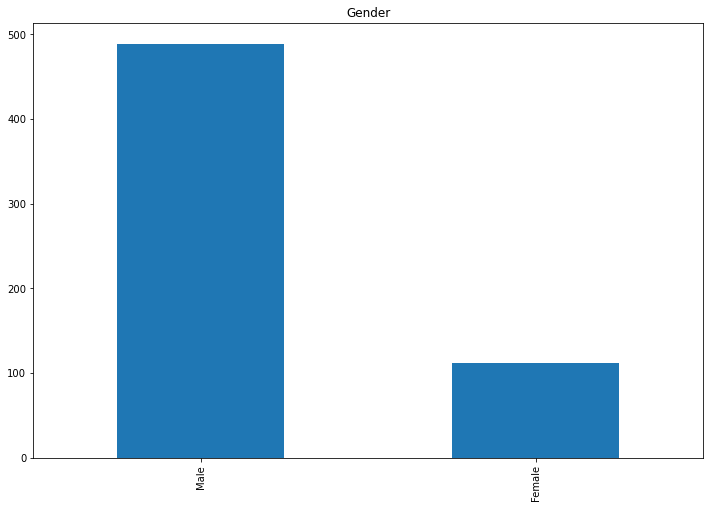

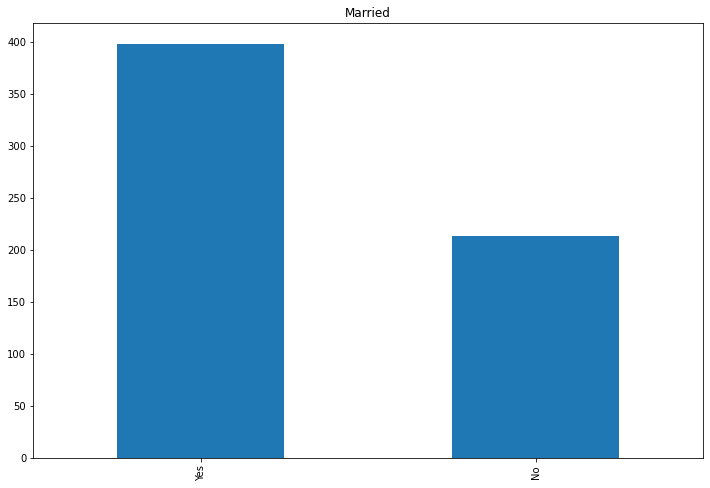

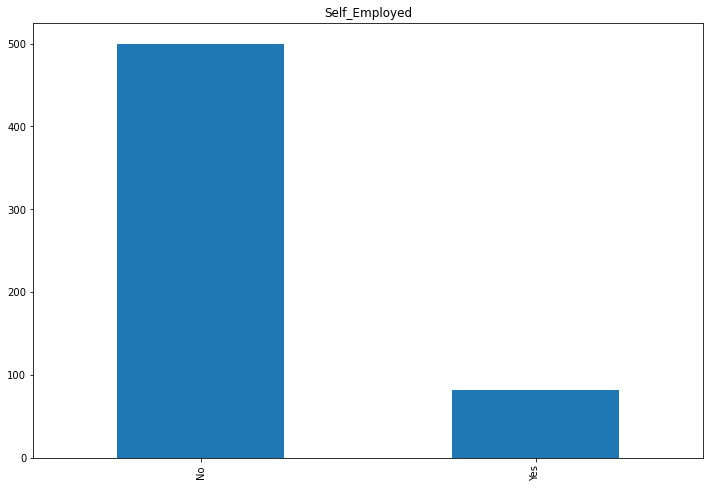

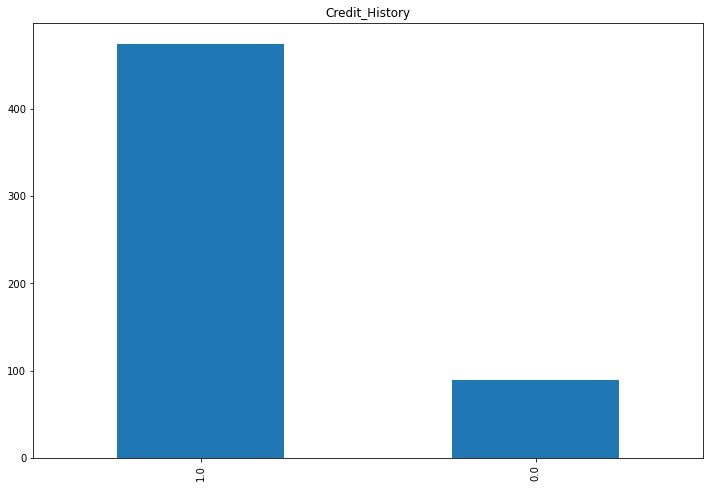

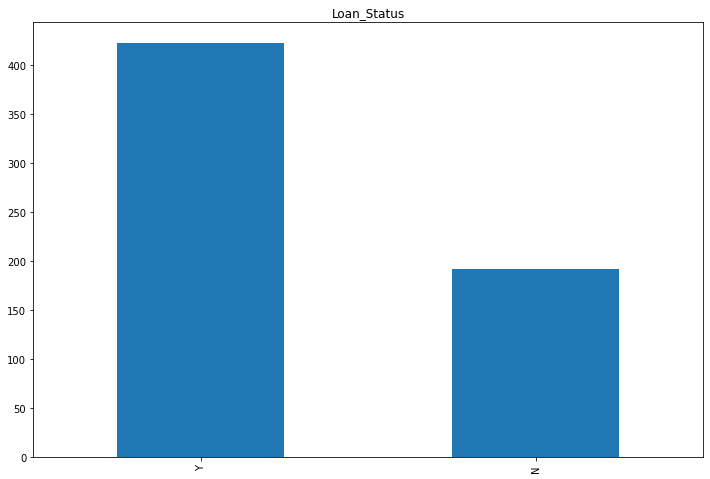

In [6]:
cat_columns = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Status']
for i in cat_columns:
    loan_status_dataset[i].value_counts().plot.bar(figsize=(12,8),title=i)
    plt.show()

## Now lets visualize the independent variables those are ordinal

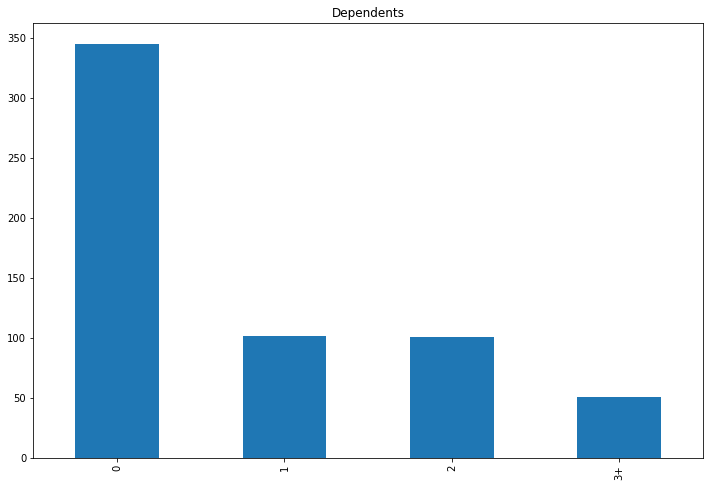

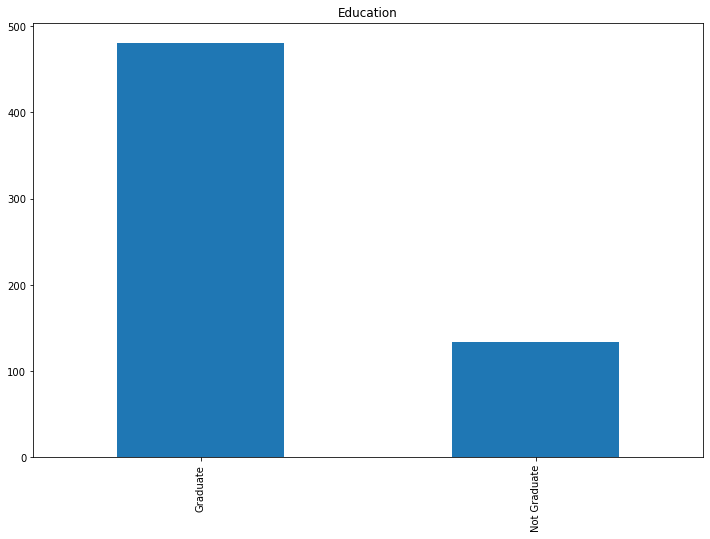

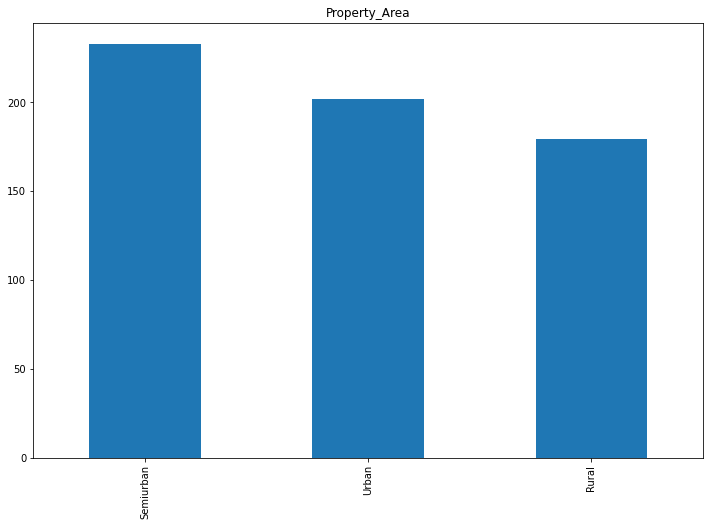

In [7]:
ord_columns = ['Dependents', 'Education', 'Property_Area']
for i in ord_columns:
    loan_status_dataset[i].value_counts().plot.bar(figsize=(12,8),title=i)
    plt.show()

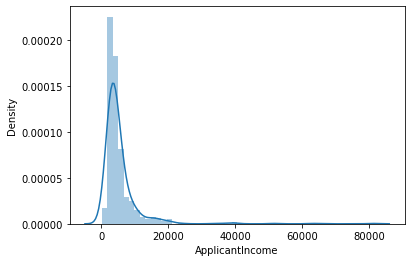

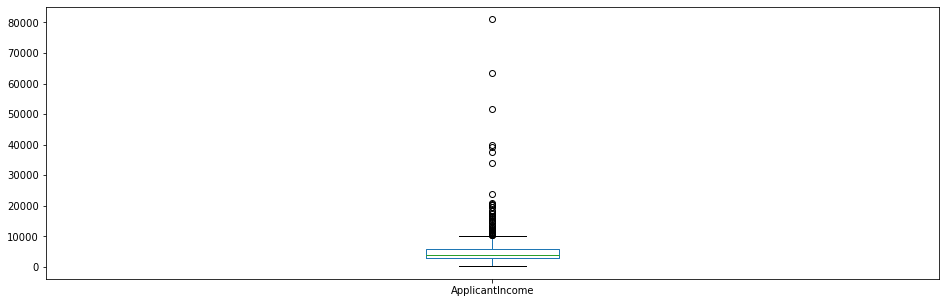

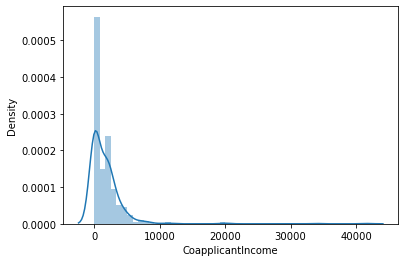

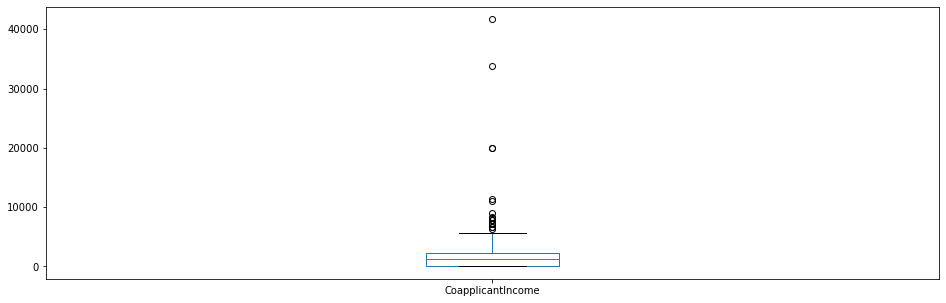

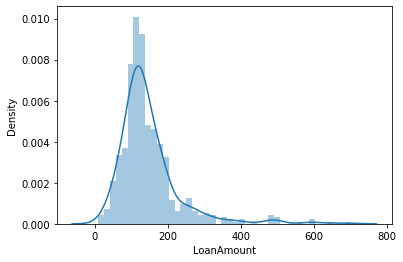

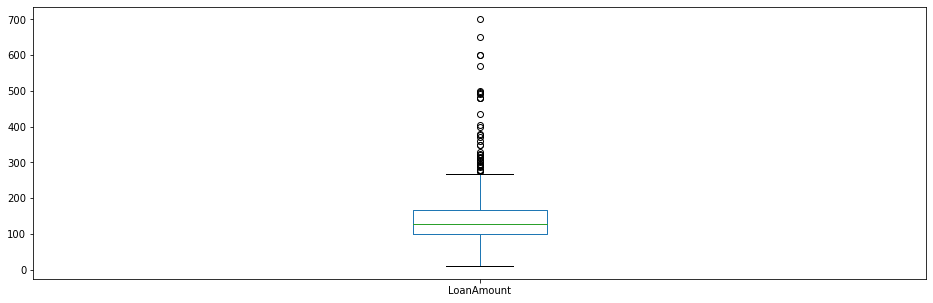

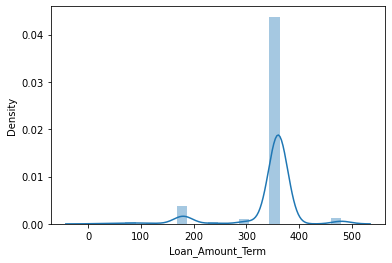

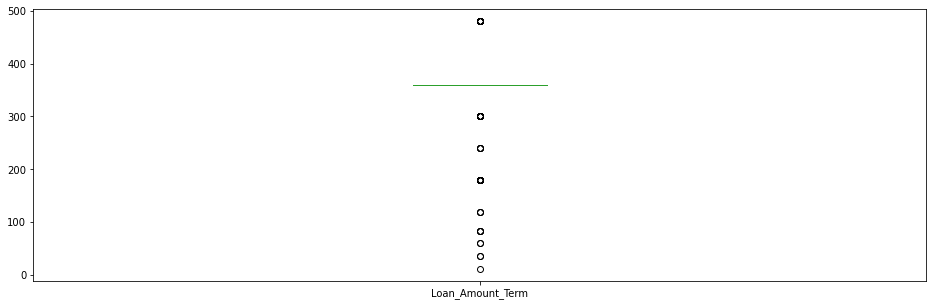

In [8]:
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for i in num_columns:
    sns.distplot(loan_status_dataset[i])
    plt.show()
    loan_status_dataset[i].plot.box(figsize=(16,5))
    plt.show()

<AxesSubplot:>

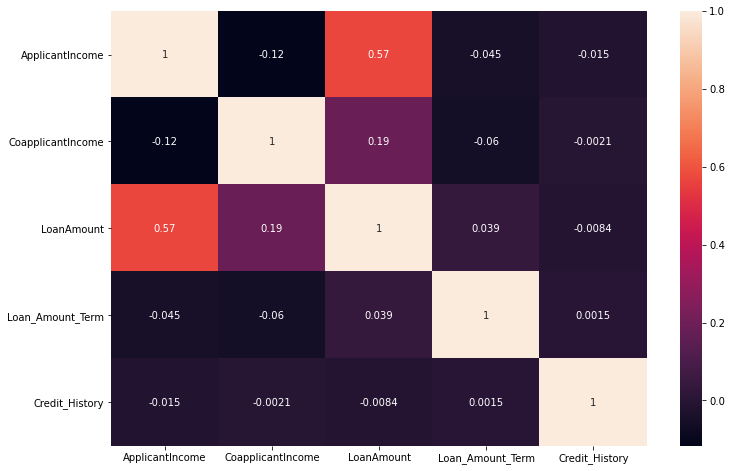

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_status_dataset.corr(),annot = True)

In [10]:
loan_status_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_status_dataset.shape

(614, 13)

In [12]:
temp_columns = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for i in temp_columns:
    print(loan_status_dataset[i].value_counts())
    print("\n*******************\n")

Male      489
Female    112
Name: Gender, dtype: int64

*******************

Yes    398
No     213
Name: Married, dtype: int64

*******************

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

*******************

No     500
Yes     82
Name: Self_Employed, dtype: int64

*******************

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

*******************

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

*******************

1.0    475
0.0     89
Name: Credit_History, dtype: int64

*******************



<AxesSubplot:>

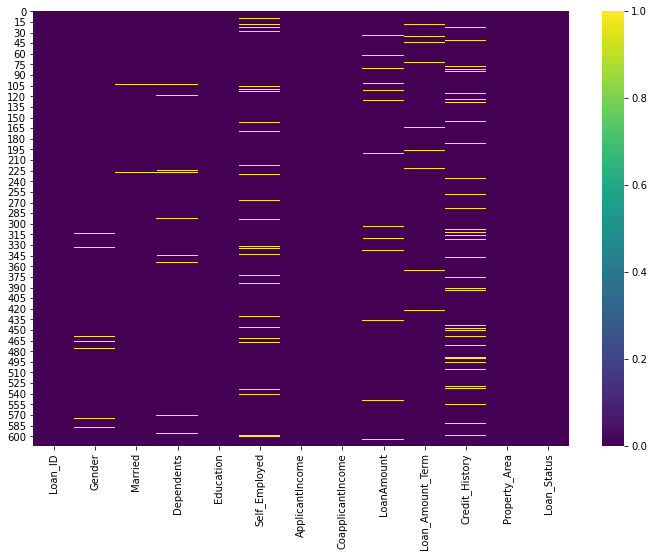

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_status_dataset.isnull(),cmap='viridis')

In [14]:
null_fill_columns = ['Gender','Married','Dependents','Self_Employed','Credit_History']

for i in null_fill_columns:
    loan_status_dataset[i].fillna(loan_status_dataset[i].mode()[0], inplace=True)

## Now try to replace values in Loan_Amount_Term column

In [15]:
loan_status_dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Now we can see 360 is the highest repeating number in the column so we can replace every null value by 360

In [16]:
loan_status_dataset['Loan_Amount_Term'].fillna(loan_status_dataset['Loan_Amount_Term'].mode()[0], inplace=True)

## Now we will replace null values in LoanAmount column, it is a numerical value column so we have two options either we can use
## median or mean to replace, but above we have seen that this column has outliers so the mean is not a good choice so we will
## go with median

In [17]:
loan_status_dataset['LoanAmount'].fillna(loan_status_dataset['LoanAmount'].median(), inplace=True)

In [18]:
loan_status_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

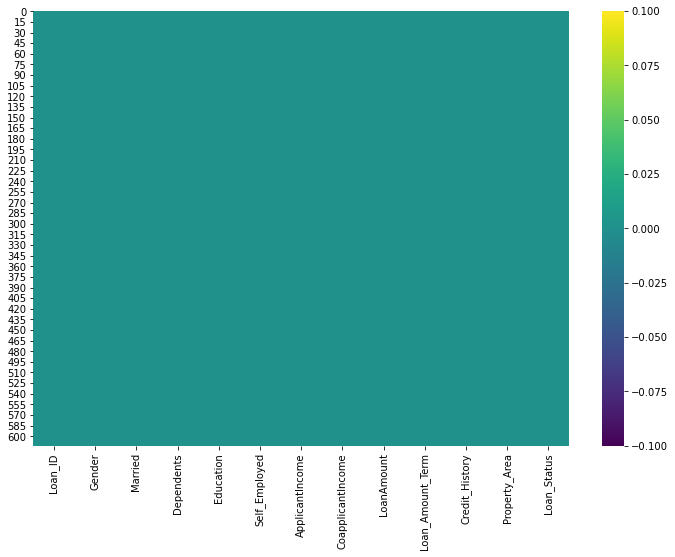

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_status_dataset.isnull(),cmap='viridis')

In [20]:
loan_status_dataset['LoanAmount_Log'] = np.log(loan_status_dataset['LoanAmount'])

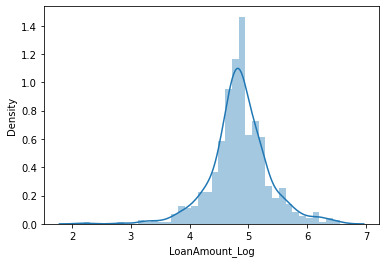

In [21]:
sns.distplot(loan_status_dataset['LoanAmount_Log'])
plt.show()

## Now above column is more like as a normally distributed

# Building model

In [22]:
model_dataset = loan_status_dataset.drop('Loan_ID', axis = 1 )

In [23]:
model_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109


In [24]:
X = model_dataset.drop('Loan_Status',axis = 1)
y = model_dataset.Loan_Status

In [25]:
X = pd.get_dummies(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
loan_status_logistic_model = LogisticRegression()

In [29]:
loan_status_logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [30]:
loan_status_logistic_model_predict = loan_status_logistic_model.predict(X_test)

## for visualizing our performance we now use confusion matrix

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, loan_status_logistic_model_predict))
print('===================================')
print(confusion_matrix(Y_test, loan_status_logistic_model_predict))

              precision    recall  f1-score   support

           N       0.76      0.50      0.60        52
           Y       0.83      0.94      0.88       133

    accuracy                           0.82       185
   macro avg       0.80      0.72      0.74       185
weighted avg       0.81      0.82      0.80       185

[[ 26  26]
 [  8 125]]


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(Y_test, loan_status_logistic_model_predict)

0.8162162162162162